In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [111]:
InitialConnectivity = scipy.io.loadmat('D:/Google Drive/PhD/SynRewSimulations/Data/2009_09_04.17_48_33 32Syn300s/InitialConnectivity.mat')
Params = scipy.io.loadmat('D:/Google Drive/PhD/SynRewSimulations/Data/2009_09_04.17_48_33 32Syn300s/Params.mat')

In [112]:
InitialConnectivity

{'ConnPostToPre': array([[ 20,   4, 243, ..., 235,  46,  42],
        [210,  78, 226, ..., 254, 240,  17],
        [ 38, 209,  51, ..., 111, 193, 241],
        ..., 
        [274, 259, 274, ..., 494, 511, 511],
        [498, 276, 275, ..., 512, 271, 481],
        [498, 499, 276, ..., 287, 288, 288]], dtype=uint16),
 'WeightPostToPre': array([[ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        ..., 
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Sep 04 17:48:33 2009',
 '__version__': '1.0'}

In [113]:
conn = InitialConnectivity['ConnPostToPre']

In [114]:
conn.shape

(32L, 256L)

In [115]:
conn

array([[ 20,   4, 243, ..., 235,  46,  42],
       [210,  78, 226, ..., 254, 240,  17],
       [ 38, 209,  51, ..., 111, 193, 241],
       ..., 
       [274, 259, 274, ..., 494, 511, 511],
       [498, 276, 275, ..., 512, 271, 481],
       [498, 499, 276, ..., 287, 288, 288]], dtype=uint16)

In [116]:
np.min(conn)

1

In [117]:
np.max(conn, axis=1)

array([256, 256, 255, 256, 256, 256, 256, 256, 256, 256, 255, 256, 256,
       251, 256, 255, 512, 512, 512, 512, 510, 510, 512, 511, 511, 511,
       512, 512, 512, 511, 512, 512], dtype=uint16)

In [118]:
np.diff(np.max(conn, axis=1).astype(dtype=np.int32))

array([  0,  -1,   1,   0,   0,   0,   0,   0,   0,  -1,   1,   0,  -5,
         5,  -1, 257,   0,   0,   0,  -2,   0,   2,  -1,   0,   0,   1,
         0,   0,  -1,   1,   0])

In [119]:
init_ff_weights = np.ones((256, 256)) * 0
init_lat_weights = np.ones((256,256)) * 0

In [120]:
# ConnPostToPre(Syn,PostX*N1D+PostY+1) = PreLoc + Area;
for row in range(conn.shape[0]):
    for column in range(conn.shape[1]):
        if conn[row, column] <= 255:
            init_ff_weights[conn[row, column] - 1, column] += .2
        else:
            init_lat_weights[conn[row, column] - 256 - 1, column] += .2

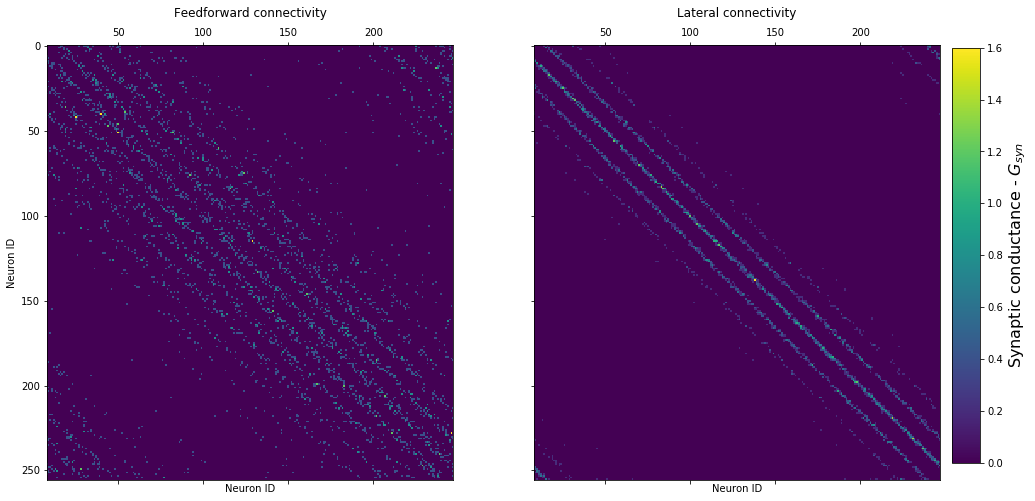

In [121]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)

ff_conn_ax = ax1.matshow(init_ff_weights, vmin=0)
lat_conn_ax = ax2.matshow(init_lat_weights, vmin=0)

ax1.set_title("Feedforward connectivity")
ax1.set_xlabel("Neuron ID")
ax2.set_title("Lateral connectivity")
ax2.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [122]:
np.sum(init_ff_weights, axis=0)

array([ 3.2,  3.2,  3. ,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3. ,
        3.2,  3.2,  3.2,  3.2,  3. ,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3. ,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3. ,  3.2,  3.2,  3.2,  3.2,  3.2,  3. ,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3. ,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,
        3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3.2,  3

In [123]:
np.count_nonzero(init_ff_weights, axis=0)

array([16, 14, 12, 16, 15, 15, 14, 15, 15, 16, 14, 16, 15, 15, 13, 15, 15,
       15, 16, 12, 16, 15, 14, 14, 15, 12, 14, 15, 12, 12, 15, 16, 15, 15,
       15, 15, 14, 14, 15, 15, 13, 16, 15, 14, 14, 12, 16, 14, 15, 15, 11,
       14, 14, 13, 14, 16, 15, 14, 16, 14, 16, 16, 15, 15, 13, 15, 13, 15,
       16, 16, 15, 16, 14, 15, 14, 16, 16, 13, 15, 14, 16, 14, 12, 16, 12,
       14, 16, 14, 13, 16, 15, 16, 14, 14, 15, 15, 14, 15, 15, 14, 14, 16,
       16, 16, 16, 15, 15, 12, 15, 13, 15, 15, 15, 15, 15, 14, 13, 13, 15,
       14, 16, 15, 16, 15, 13, 15, 16, 15, 14, 13, 14, 15, 12, 13, 15, 16,
       16, 16, 15, 14, 15, 12, 15, 15, 14, 15, 15, 14, 15, 14, 16, 14, 15,
       14, 14, 15, 16, 15, 15, 16, 14, 13, 14, 15, 14, 16, 16, 14, 15, 16,
       15, 15, 14, 15, 16, 16, 14, 15, 14, 16, 14, 14, 13, 14, 14, 14, 14,
       16, 14, 14, 15, 13, 14, 14, 14, 16, 14, 14, 15, 16, 15, 15, 11, 16,
       15, 14, 13, 12, 16, 11, 13, 13, 15, 14, 13, 14, 16, 12, 14, 14, 16,
       15, 13, 14, 15, 12

In [124]:
grid = np.array([16,16])

In [125]:
def fan_in(conn, weight, mode, area):
    conn = np.copy(conn)
    if 'rec' in area:
        conn[conn<=256] = 0
    if 'ff' in area:
        conn[conn>256] = 0
    output = np.zeros((256,256))
    
    for syn in range(conn.shape[0]):
        for post_x in range(16):
            for post_y in range(16):
                pre_loc = int(conn[syn, post_x * 16 + post_y])
                if pre_loc > 0:
                    pre_loc = np.mod(pre_loc-1, 256)
                    pre_x = int(np.floor(pre_loc/16.))
                    pre_y = np.mod(pre_loc, 16)
#                     print pre_x, pre_y, post_x, post_y 
#                     break
                    if 'conn' in mode:
                        output[post_x * 16 + pre_x, post_y * 16 + pre_y] += 1
                    else:
                        output[post_x * 16 + pre_x, post_y * 16 + pre_y] += weight[syn, post_x * 16 + post_y]
    return output

In [126]:
ff_fan_in = fan_in(conn, InitialConnectivity['WeightPostToPre'], 'conn', 'ff')
lat_fan_in = fan_in(conn, InitialConnectivity['WeightPostToPre'], 'conn', 'rec')

In [108]:
ff_fan_in

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.]])

In [109]:
lat_fan_in

array([[ 2.,  2.,  0., ...,  0.,  2.,  3.],
       [ 1.,  2.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 2.,  1.,  1., ...,  0.,  0.,  0.],
       [ 3.,  1.,  0., ...,  0.,  2.,  4.]])

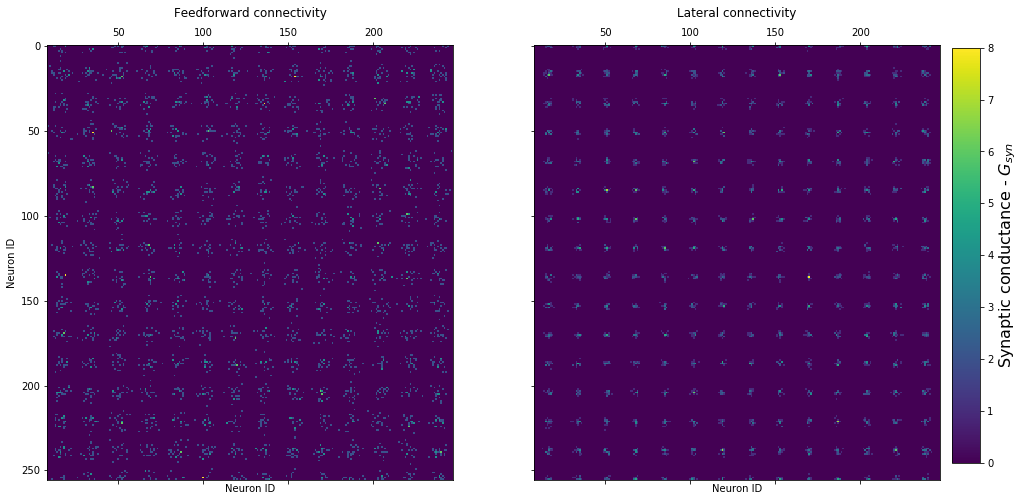

In [73]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)

ff_conn_ax = ax1.matshow(ff_fan_in, vmin=0)
lat_conn_ax = ax2.matshow(lat_fan_in, vmin=0)

ax1.set_title("Feedforward connectivity")
ax1.set_xlabel("Neuron ID")
ax2.set_title("Lateral connectivity")
ax2.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [74]:
import scipy.io as sio

In [75]:
sio.savemat("fan_in.mat", {'fan_in':ff_fan_in})

In [24]:
#print init_mean_std, "compared to", 2.36

In [25]:
#print init_mean_AD, "compared to", 0.78

In [26]:
debug_var = None

In [76]:
def centre_weights(in_star_all, n1d):
    in_star_all = np.copy(in_star_all)
    global debug_var
    half_range = n1d / 2
    mean_projection = np.zeros((n1d+1, n1d+1))
    mean_centred_projection = np.zeros((n1d+1, n1d+1))
    positions = np.arange(-half_range, half_range + 1)
    means_and_std_devs = np.zeros((n1d**2, 8))
    means_for_plot = np.zeros((n1d**2*2-1, 2))
    std_devs_xs = np.zeros(n1d)
    std_devs_ys = np.zeros(n1d)
    std_devs_xs_fine = np.zeros(11)
    std_devs_ys_fine = np.zeros(11)
    
    for y in range(n1d):
        for x in range(n1d):
            in_star = np.copy(in_star_all[y*n1d:(y+1)*n1d, x*n1d:(x+1)*n1d])
            in_star_extended =  np.tile(in_star, [3,3])
            if np.sum(in_star) > 0:
                # Add to the mean projection
                ideal_centred = np.copy(in_star_extended[n1d+y-half_range : n1d+y+half_range+1, n1d+x-half_range:n1d+x+half_range+1])
                ideal_centred[0,:] = ideal_centred[0,:] /2.
                ideal_centred[n1d,:] = ideal_centred[n1d,:] /2.
                ideal_centred[:,0] = ideal_centred[:,0] /2.
                ideal_centred[:,n1d] = ideal_centred[:,n1d] /2.
                
                mean_projection += ideal_centred
                
                #  ^^ So far so good ^^ 
                # Find the coarse centre of mass
                for pos in range(n1d):
                    temp_centred = np.copy(in_star_extended[n1d+pos-half_range : n1d+pos+half_range+1, n1d+pos-half_range:n1d+pos+half_range+1])
                    # correct the edges of centred
                    temp_centred[0,:] = temp_centred[0,:] /2.
                    temp_centred[n1d,:] = temp_centred[n1d,:] /2.
                    temp_centred[:,0] = temp_centred[:,0] /2.
                    temp_centred[:,n1d] = temp_centred[:,n1d] /2.
                    #calculate the StdDev
                    centred_x = np.sum(temp_centred, axis=0)
                    centred_y = np.sum(temp_centred, axis=1)
                    std_devs_xs[pos] = np.sqrt(np.sum(centred_x*(positions**2))/np.sum(centred_x));
                    std_devs_ys[pos] = np.sqrt(np.sum(centred_y*(positions**2))/np.sum(centred_y));
                        
                std_dev_x = np.min(std_devs_xs)
                pos_x =  np.argmin(std_devs_xs)
                std_dev_y = np.min(std_devs_ys)
                pos_y =  np.argmin(std_devs_ys)
                
#                 print pos_x, pos_y
#                 print std_dev_x, std_dev_y
                
    
                
                # reconstruct the coarsely centred receptive field
                centred_coarse = np.copy(in_star_extended[n1d+pos_y-half_range : n1d+pos_y+half_range+1, n1d+pos_x-half_range:n1d+pos_x+half_range+1])
                centred_coarse[0,:] = centred_coarse[0,:] /2.
                centred_coarse[n1d,:] = centred_coarse[n1d,:] /2.
                centred_coarse[:,0] = centred_coarse[:,0] /2.
                centred_coarse[:,n1d] = centred_coarse[:,n1d] /2.
                
                for pos_fine in np.linspace(-.5, .5, 11):
                    assert std_devs_xs[pos_x] == std_dev_x, "{0} != {1}".format(std_devs_xs[pos_x], std_dev_x)
                    assert std_devs_ys[pos_y] == std_dev_y, "{0} != {1}".format(std_devs_ys[pos_y], std_dev_y)
                    
                    temp_centred_fine = np.copy(in_star_extended[n1d+pos_y-half_range : n1d+pos_y+half_range+1, n1d+pos_x-half_range:n1d+pos_x+half_range+1])
                    # correct the edges of centred
                    temp_centred_fine[0,:]   = temp_centred_fine[0,:]   * (.5 - pos_fine)
                    temp_centred_fine[n1d,:] = temp_centred_fine[n1d,:] * (.5 + pos_fine)
                    temp_centred_fine[:,0]   = temp_centred_fine[:,0]   * (.5 - pos_fine)
                    temp_centred_fine[:,n1d] = temp_centred_fine[:,n1d] * (.5 + pos_fine)
                    
                    #calculate the StdDev
                    centred_x = np.sum(temp_centred_fine, axis=0)
                    centred_y = np.sum(temp_centred_fine, axis=1)
                    positions_fine = np.arange(-half_range, half_range+1) - pos_fine
                    positions_fine = positions_fine.flatten()
                    std_devs_xs_fine[int(np.round(pos_fine*10)+5)] = np.sqrt(np.sum(centred_x*(positions_fine**2))/np.sum(centred_x))
                    std_devs_ys_fine[int(np.round(pos_fine*10)+5)] = np.sqrt(np.sum(centred_y*(positions_fine**2))/np.sum(centred_y))
                
                assert std_dev_x==std_devs_xs_fine[5], "{0} != {1}".format(std_dev_x, std_devs_xs_fine[5])
                assert std_dev_y==std_devs_ys_fine[5], "{0} != {1}".format(std_dev_y, std_devs_ys_fine[5])
                std_dev_x =     np.min(std_devs_xs_fine)
                pos_x_fine = np.argmin(std_devs_xs_fine)
                std_dev_y =     np.min(std_devs_ys_fine)
                pos_y_fine = np.argmin(std_devs_ys_fine)
                pos_x_fine = (pos_x_fine-5)/10.
                pos_y_fine = (pos_y_fine-5)/10.
                
#                 print pos_x_fine, pos_y_fine
#                 print
#                 print pos_x_fine, pos_y_fine
#                 pos_x_fine = 0
#                 pos_y_fine = 0
#                 %reconstruct the finely centred receptive field and add to the mean centred projection
#                 CentredLeft = CentredCoarse(:,[2:N1D+1 1]);
#                 CentredRight = CentredCoarse(:,[N1D+1 1:N1D]);
#                 CentredFineX = CentredLeft * max([0 -PosXFine]) + CentredCoarse * (1-abs(PosXFine)) + CentredRight * max([0 PosXFine]);

#                 CentredUp = CentredFineX([2:N1D+1 1],:);
#                 CentredDown = CentredFineX([N1D+1 1:N1D],:);
#                 CentredFine = CentredUp * max([0 -PosYFine]) + CentredFineX * (1-abs(PosYFine)) + CentredDown * max([0 PosYFine]);

#                 MeanCentredProjection = MeanCentredProjection + CentredFine;
#                 centred_left = centred_coarse[:,1:n1d, 0]
    
                std_dev = np.mean([std_dev_x, std_dev_y])
                
                mean_x = pos_x+pos_x_fine -x
                mean_y = pos_y+pos_y_fine -y
                if mean_x > half_range:
                    mean_x = mean_x - n1d
                if mean_x < -half_range:
                    mean_x = mean_x + n1d
                if mean_y > half_range:
                    mean_y = mean_y - n1d
                if mean_y < -half_range:
                    mean_y = mean_y + n1d
                mean_dist = np.sqrt(mean_x**2+mean_y**2)
            else:
                mean_x = 0;
                mean_y = 0;
                mean_dist = 0;
                std_dev = 0;
            # For quiver plots
            if mean_dist == 0:
                means_and_std_devs[y*n1d+x,:] = np.asarray([x, y, mean_x, mean_y, mean_dist, std_dev, 0,0])
            else:
                means_and_std_devs[y*n1d+x,:] = np.asarray([x, y, mean_x, mean_y, mean_dist, std_dev, mean_x/mean_dist, mean_y/mean_dist])
            # For mapping plots

#     return (mean_projection/(n1d**2), std_dev)
    mean_projection = mean_projection/(n1d**2)
    mean_centred_projection = mean_centred_projection/(n1d**2)
    return (mean_projection, means_and_std_devs, means_for_plot, mean_centred_projection)


In [77]:
mean_projection, means_and_std_devs, means_for_plot, mean_centred_projection = centre_weights(ff_fan_in, 16)

In [78]:
np.mean(mean_projection)

0.05536332179930796

In [79]:
np.mean(mean_centred_projection)

0.0

In [80]:
print np.mean(means_and_std_devs[:, 5]), ' compared to ans = 2.3550'  

2.354969065  compared to ans = 2.3550


In [81]:
np.mean(means_and_std_devs[:, 4]) # mean AD

0.81999250581737781

In [33]:
matlabified_masd = np.copy(means_and_std_devs)
matlabified_masd[:, 0] += 1
matlabified_masd[:, 1] += 1

In [34]:
sio.savemat("means_and_std_devs.mat", {'means_and_std_devs':matlabified_masd})

In [158]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    delta = np.where(delta > grid * .5, delta - grid, delta)

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))

In [159]:
conn = IntialConnectivity['ConnPostToPre'] - 1
weight = InitialConnectivity['WeightPostToPre']

In [160]:
distances = []
for target_neuron in range(conn.shape[1]):
    for index in range(conn.shape[0]):
        if conn[index, target_neuron] >= 256:
            pre = conn[index, target_neuron] - 256
            pre_location = [pre//16, pre%16]
            post_location = [target_neuron//16, target_neuron%16]
            distances.append(distance(pre_location, post_location))

In [161]:
distances

[1.0,
 1.0,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.0,
 3.1622776601683795,
 0.0,
 1.0,
 0.0,
 1.4142135623730951,
 1.0,
 1.0,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 2.0,
 1.0,
 1.0,
 0.0,
 2.2360679774997898,
 1.4142135623730951,
 2.2360679774997898,
 1.0,
 1.4142135623730951,
 0.0,
 2.0,
 1.4142135623730951,
 1.4142135623730951,
 1.0,
 2.2360679774997898,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 2.8284271247461903,
 1.0,
 2.0,
 1.4142135623730951,
 1.0,
 1.0,
 0.0,
 1.0,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 2.2360679774997898,
 1.4142135623730951,
 1.0,
 0.0,
 0.0,
 2.2360679774997898,
 1.0,
 1.0,
 1.4142135623730951,
 2.8284271247461903,
 2.2360679774997898,
 0.0,
 2.0,
 1.4142135623730951,
 0.0,
 1.4142135623730951,
 1.0,
 0.0,
 0.0,
 0.0,
 2.8284271247461903,
 1.4142135623730951,
 2.0,
 1.4142135623730951,
 0.0,
 1.0,
 1.0,
 1.0,
 2.2360679774997898

In [193]:
xhist, xbins = np.histogram(distances, normed=True)
# xhist = np.sqrt(xhist)

(array([ 1.,  0.,  0.,  0.,  0.,  0.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

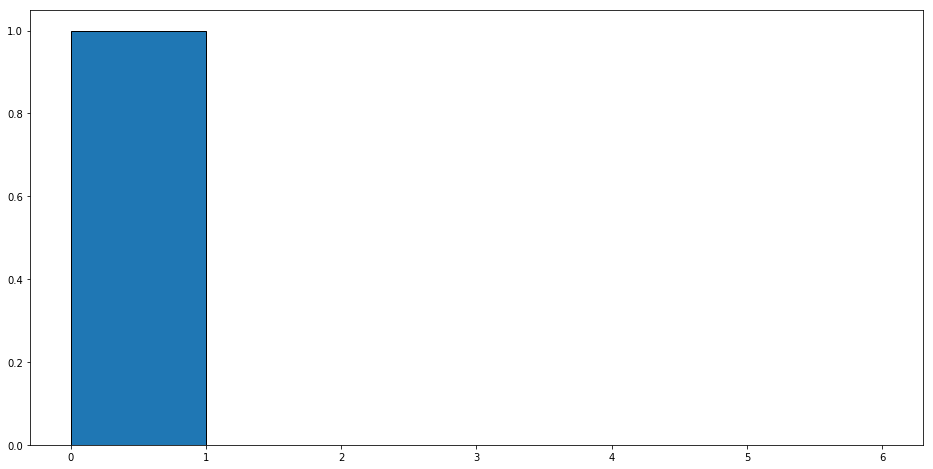

In [197]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.hist(xhist, bins=range(16//2 - 1), edgecolor='black', normed=True)

In [187]:
np.floor(distances)

array([ 1.,  1.,  1., ...,  1.,  1.,  2.])

In [195]:
np.min(distances)

0.0

In [196]:
np.max(distances)

4.1231056256176606

In [204]:
angle = np.linspace(0, 2*np.pi, 100)

In [205]:
angle

array([ 0.        ,  0.06346652,  0.12693304,  0.19039955,  0.25386607,
        0.31733259,  0.38079911,  0.44426563,  0.50773215,  0.57119866,
        0.63466518,  0.6981317 ,  0.76159822,  0.82506474,  0.88853126,
        0.95199777,  1.01546429,  1.07893081,  1.14239733,  1.20586385,
        1.26933037,  1.33279688,  1.3962634 ,  1.45972992,  1.52319644,
        1.58666296,  1.65012947,  1.71359599,  1.77706251,  1.84052903,
        1.90399555,  1.96746207,  2.03092858,  2.0943951 ,  2.15786162,
        2.22132814,  2.28479466,  2.34826118,  2.41172769,  2.47519421,
        2.53866073,  2.60212725,  2.66559377,  2.72906028,  2.7925268 ,
        2.85599332,  2.91945984,  2.98292636,  3.04639288,  3.10985939,
        3.17332591,  3.23679243,  3.30025895,  3.36372547,  3.42719199,
        3.4906585 ,  3.55412502,  3.61759154,  3.68105806,  3.74452458,
        3.8079911 ,  3.87145761,  3.93492413,  3.99839065,  4.06185717,
        4.12532369,  4.1887902 ,  4.25225672,  4.31572324,  4.37

In [206]:
angle.size

100

In [208]:
size_y, size_x = np.zeros((10,20)).shape

In [209]:
size_y

10L

In [210]:
size_x

20L

In [211]:
insize = 17

In [214]:
centre = insize / 2. + .5

In [215]:
centre

9.0

In [216]:
sampleradius = np.floor(insize/2.)

In [217]:
np.arange(0, sampleradius)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])